In [1]:
import tensorflow as tf
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers,Sequential,callbacks,preprocessing
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
import numpy as np
import os

In [2]:
extns=['jpg','jpeg','png','bmp']

In [3]:
maindir='dataset'
traindir='train'
testdir='test'
for image in os.listdir(os.path.join(maindir,testdir)):
    try:
        filetype=image.split('.')[-1]
        if filetype not in extns:
            print(f'Invalid file format {os.path.join(maindir,testdir,image)}')
            os.remove(os.path.join(maindir,testdir,image))
    except Exception as e:
        print(f'Problem with file {os.path.join(maindir,testdir,image)}')
for dirs in os.listdir(os.path.join(maindir,traindir)):
    for image in os.listdir(os.path.join(maindir,traindir,dirs)):
        try:
            filetype=image.split('.')[-1]
            if filetype not in extns:
                print(f'Invalid file format {os.path.join(maindir,traindir,dirs,image)}')
                os.remove(os.path.join(maindir,traindir,dirs,image))
        except Exception as e:
            print(f'Problem with file {os.path.join(maindir,traindir,image)}')


In [4]:
print(len(os.listdir(os.path.join(maindir,testdir))))
print(len(os.listdir(os.path.join(maindir,traindir,'Cat'))))
print(len(os.listdir(os.path.join(maindir,traindir,'Dog'))))

12500
12500
12500


In [5]:
traindata=preprocessing.image_dataset_from_directory(os.path.join(maindir,traindir),image_size=(128,128))

Found 25000 files belonging to 2 classes.


In [6]:
traindata=traindata.map(lambda x,y:(x/255,y))
traindata_iterator=traindata.as_numpy_iterator()

In [7]:
batch=traindata_iterator.next()
print(batch[0].shape)
print(batch[1].shape)
print(batch[1])
print(batch[0].max())

(32, 128, 128, 3)
(32,)
[0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0]
1.0


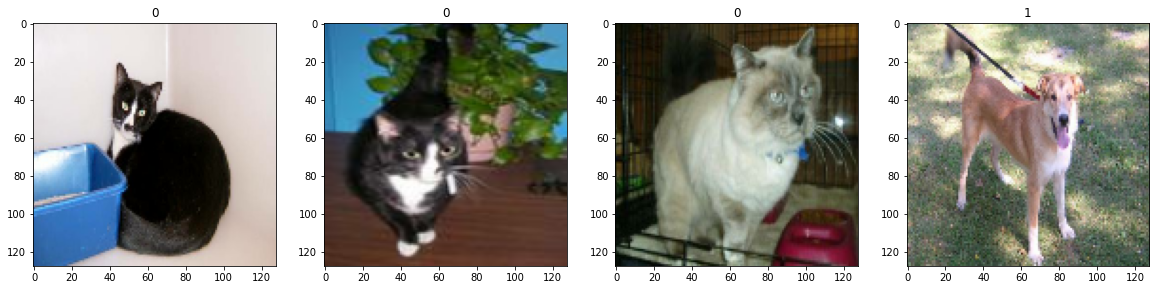

In [8]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 0: Cats, 1: Dogs

In [9]:
class_labels=['Cat','Dog']

In [10]:
model=Sequential()

In [11]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(128,128,3),padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(32,(3,3),1,activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(64,(3,3),1,activation='relu',padding='same'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [14]:
len(traindata)

782

In [15]:
train_size=int(len(traindata)*.8)
val_size=int(len(traindata)*.2)+1
print(train_size+val_size)

782


In [16]:
train=traindata.take(train_size)
val=traindata.skip(train_size).take(val_size)
print(len(train),len(val))

625 157


In [17]:
logsdir='dir'
tf_callbacks=callbacks.TensorBoard(log_dir=logsdir)

In [18]:
history=model.fit(train,epochs=5,shuffle=True,validation_data=val,callbacks=[tf_callbacks])

Epoch 1/5
625/625 [==============================] - 300s 478ms/step - loss: 0.5717 - accuracy: 0.6936 - val_loss: 0.5487 - val_accuracy: 0.7258
Epoch 2/5
625/625 [==============================] - 268s 429ms/step - loss: 0.4563 - accuracy: 0.7865 - val_loss: 0.4482 - val_accuracy: 0.7892
Epoch 3/5
625/625 [==============================] - 268s 429ms/step - loss: 0.3979 - accuracy: 0.8205 - val_loss: 0.3976 - val_accuracy: 0.8214
Epoch 4/5
625/625 [==============================] - 277s 443ms/step - loss: 0.3488 - accuracy: 0.8475 - val_loss: 0.3733 - val_accuracy: 0.8354
Epoch 5/5
625/625 [==============================] - 277s 443ms/step - loss: 0.2965 - accuracy: 0.8737 - val_loss: 0.3629 - val_accuracy: 0.8428


In [19]:
history.history

{'loss': [0.5717358589172363,
  0.45627498626708984,
  0.39792120456695557,
  0.34878814220428467,
  0.2964833378791809],
 'accuracy': [0.6935999989509583,
  0.7864999771118164,
  0.8204500079154968,
  0.8474500179290771,
  0.8737499713897705],
 'val_loss': [0.548693835735321,
  0.44816073775291443,
  0.3976486027240753,
  0.3732612431049347,
  0.3628757894039154],
 'val_accuracy': [0.7257999777793884,
  0.7892000079154968,
  0.821399986743927,
  0.8353999853134155,
  0.8428000211715698]}

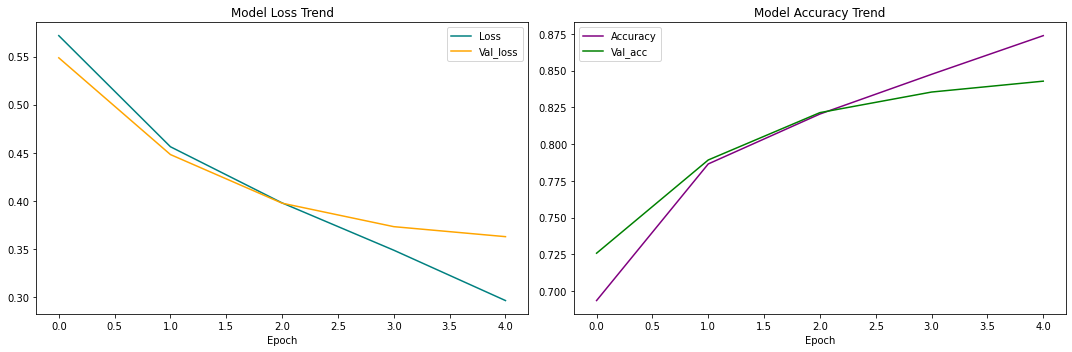

In [20]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1.plot(history.history['loss'],label='Loss',color='teal')
ax1.plot(history.history['val_loss'],label='Val_loss',color='orange')
ax1.set_title('Model Loss Trend')
ax1.set_xlabel('Epoch')
ax1.legend()

ax2.plot(history.history['accuracy'],label='Accuracy',color='purple')
ax2.plot(history.history['val_accuracy'],label='Val_acc',color='green')
ax2.set_title('Model Accuracy Trend')
ax2.legend()
ax2.set_xlabel('Epoch')
fig.tight_layout()

### Model testing: random images from internet

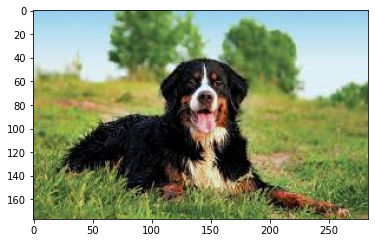

(128, 128, 3)


In [21]:
img=cv2.imread('images.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
resizeimage=tf.image.resize(img,(128,128))
print(resizeimage.shape)

In [22]:
resizeimage=np.expand_dims(resizeimage/255,0)
resizeimage.shape

(1, 128, 128, 3)

In [23]:
pred=model.predict(resizeimage)
pred=pred[0].item()
if pred>=.5:
    pred=1
else:
    pred=0
print(class_labels[pred])

1/1 [==============================] - 0s 186ms/step
Dog


In [24]:
file_path=[os.path.join(maindir,testdir,image) for image in os.listdir(os.path.join(maindir,testdir))]
labels=[i for i in os.listdir(os.path.join(maindir,testdir))]

In [25]:
test_df=pd.DataFrame({'path':file_path})
test_df.head(5)

,path
0,dataset\test\1.jpg
1,dataset\test\10.jpg
2,dataset\test\100.jpg
3,dataset\test\1000.jpg
4,dataset\test\10000.jpg


In [26]:
datagen=preprocessing.image.ImageDataGenerator(rescale=1./255)
test=datagen.flow_from_dataframe(dataframe=test_df,x_col='path',y_col=None,class_mode=None,shuffle=False,target_size=(128,128))
test

Found 12500 validated image filenames.


In [27]:
idx=[int(str(i).split('.')[0]) for i in labels]

In [28]:
preds=model.predict(test)

391/391 [==============================] - 63s 160ms/step


In [29]:
classes=[]
for i in preds:
    p=None
    if i.item()>=.5:
        p=1
    else:
        p=0
    classes.append(p)

In [30]:
submission=pd.DataFrame({
    'id':idx,
    'label':classes
})
submission.to_csv('submission.csv',index=False)

In [31]:
model.save(os.path.join('models','dog_cat_model.h5'))

In [35]:
for i in range(200):
    frame=cv2.imread(file_path[i])
    cv2.putText(frame,class_labels[classes[i]],(50,50),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),2)
    cv2.imshow('Window',frame)
    cv2.waitKey(800)
cv2.destroyAllWindows()